# Comparing gini index, information gain and entropy

In [26]:
import numpy as np
import pandas as pd
# Import machine learning methods
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.preprocessing import OneHotEncoder
data = pd.read_csv('sammi_music.csv')
data


,Song,Release Year,Genre,Does Sammi Like it?
0,Sultans of Swing,1978,Rock,Yes
1,Genie in a bottle,2004,Pop,No
2,The Room Where It Happens,2015,Musical,Yes
3,Boys of Summer,1984,Rock,Yes
4,I wish I had duck feet,1994,House,No
5,Gecko (overdrive),2014,House,Yes
6,Unknown Caller,2009,Rock,No
7,Time Warp,1975,Musical,Yes
8,Defying Gravity,2004,Musical,Yes
9,Stickwitu,2005,Pop,No


In [27]:
one_hot = pd.get_dummies(data['Genre'])
# Drop the column as it is now encoded
data_processed = data.drop('Genre',axis = 1)
# Join the encoded df
data_processed = data_processed.join(one_hot)

data_processed = data_processed.drop('Song',axis = 1)


In [28]:
one_hot

,House,Musical,Pop,Rock
0,False,False,False,True
1,False,False,True,False
2,False,True,False,False
3,False,False,False,True
4,True,False,False,False
5,True,False,False,False
6,False,False,False,True
7,False,True,False,False
8,False,True,False,False
9,False,False,True,False


In [29]:
X = data_processed.drop('Does Sammi Like it?',axis=1)
y = data_processed['Does Sammi Like it?']

In [30]:
X

,Release Year,House,Musical,Pop,Rock
0,1978,False,False,False,True
1,2004,False,False,True,False
2,2015,False,True,False,False
3,1984,False,False,False,True
4,1994,True,False,False,False
5,2014,True,False,False,False
6,2009,False,False,False,True
7,1975,False,True,False,False
8,2004,False,True,False,False
9,2005,False,False,True,False


## Gini

Gini is the default.

Accuracy of predicting training data = 1.000000
Accuracy of predicting test data = 1.000000


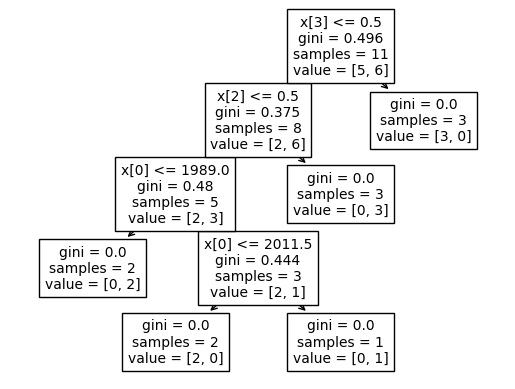

In [31]:
model = DecisionTreeClassifier() # Create a Decision Tree Model
model = model.fit(X,y) # Fit the model using our training data
# Predict training and test set labels
y_pred_train = model.predict(X)
y_pred_test = model.predict(X)
accuracy_train = np.mean(y_pred_train == y)
accuracy_test = np.mean(y_pred_test == y)

print (f'Accuracy of predicting training data = {accuracy_train:3f}')
print (f'Accuracy of predicting test data = {accuracy_test:3f}')
fig = plot_tree(model)

# Entropy

Accuracy of predicting training data = 1.000000
Accuracy of predicting test data = 1.000000


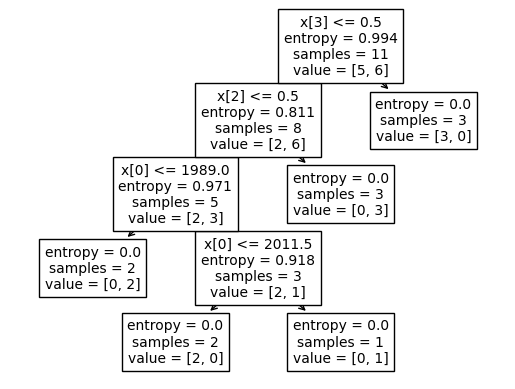

In [25]:
model = DecisionTreeClassifier(criterion="entropy") # Create a Decision Tree Model
model = model.fit(X,y) # Fit the model using our training data
# Predict training and test set labels
y_pred_train = model.predict(X)
y_pred_test = model.predict(X)
accuracy_train = np.mean(y_pred_train == y)
accuracy_test = np.mean(y_pred_test == y)

print (f'Accuracy of predicting training data = {accuracy_train:3f}')
print (f'Accuracy of predicting test data = {accuracy_test:3f}')
fig = plot_tree(model)